<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_DS/DS_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas



## Pandasとは
**Pandas**とは、データの操作・解析を目的として作られたライブラリです。  
Numpyを中で使っており、またNumpyと並んで最重要なものになります。

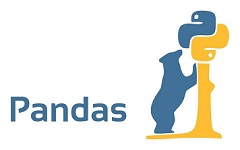

データサイエンスの分野では、多くの場合データを表形式で扱います。  
特に表形式でのデータ処理が得意なPandasは、データサイエンスには欠かせないものです。

GoogleColabやJupyter Labといった環境下では、最初から入っているため改めて入れる必要はありません。  
自分で入れる場合は`conda install pandas`や`pip install pandas`という記述をします。


pandasをimportする際、`pd`とするのが一般的です。

In [ ]:
import pandas as pd

Numpyも同時に使うことが多いので、importしてしまいましょう。

In [ ]:
import numpy as np

## Series
**Series**とは、表形式のデータの各行やカラムを切り取ったデータを表すデータ形式です。  

|Name|Sex|Age|
|---|---|---|
|Taro|male|21|
|Hanako|female|20|
|Mike|male|19|

上の表を例とすると、表の一番上に並んでいるものを**ヘッダー**、ヘッダーを構成している1つ1つの要素を**カラム**といいます。  
また、表の1行1行を**レコード**といいます。

この表から各行（レコード）・各列を切り取ったものがSeriesです。  
ますはSeriesのオブジェクトを作ってみましょう。**`pd.Series()`**とすると作ることができます。


In [ ]:
# dictionraryからSeriesを作る

data = {
    "Name" : "Taro",
    "Sex" : "male",
    "Age" : "21"
}

pd.Series(data)

左に見える"Name","Sex","Age"は、Seriesのインデックスです。  
表を横に切った場合にはカラムになります。

In [ ]:
#ndarrayからSeriesを作る

array = np.array([21,20,19])
pd.Series(array)

ndarrayからSeriesを作った場合には、Seriesのインデックスは連番の数値になります。
表を縦に切った場合と同じです。

引数**index**をつけることで、インデックスにラベルを指定することができます。

In [ ]:
array = np.array([21,20,19])
pd.Series(array,index=["Taro","Hanako","Mike"])

特定のラベルを指定して値を取り出すことができます。

In [ ]:
age = pd.Series(array,index=["Taro","Hanako","Mike"])
age["Taro"]

**`.values`**とすることで、値をnumpyとして扱うことが可能になります。

In [ ]:
age.values

また、numpyと同じように統計量を計算することもできます。

In [ ]:
age.sum()

## DataFrame
Seriesが集まったデータ構造が**DataFrame**です。  
データサイエンスのほとんどの作業において使われます。最重要です。


### pd.DataFrame()
**`pd.DataFrame()`**とするとDataframeのオブジェクトを作ることができます。

まずはndarrayからDaraFrameを作成してみましょう。  
（[こちら](https://bit.ly/3UjaaMJ)ではさらに詳しい解説がありますので、良ければ参考にしてください。）

In [ ]:
# ndarrayからDataFrameを作る

ndarray = np.arange(1,11).reshape(2,5)
pd.DataFrame(ndarray)

この場合は、カラムが列の番号、インデックスが行の番号になっています。  

この状態だと不便であるので、引数**`columns`**と**`index`**を指定することがあります。  
`index`は指定しないことが多いですが、`columns`は何らかの文字列を指定することが多いです。

In [ ]:
pd.DataFrame(ndarray , index={"index1","index2"} , columns={'columns1','columns2','columns3','columns4','columns5'})

dictionaryから作ることもできます。  
（[こちら](https://bit.ly/3dw8Rte)ではさらに詳しい解説がありますので、良ければ参考にしてください。）   

dictionaryのリストをいれると，それがそのままDataFrameになります。  
それぞれのdictionaryが同じキーを持つ必要があります。

In [ ]:
# dictionraryからDataFrameを作る

data1 = {
    "Name" : "Taro",
    "Sex" : "male",
    "Age" : "21"
}

data2 = {
    "Name" : "Hanako",
    "Sex" : "female",
    "Age" : "20"
}

data3 = {
    "Name" : "Mike",
    "Sex" : "male",
    "Age" : "19"
}

pd.DataFrame([data1,data2,data3])

同じキーを毎回書くことは、データ数が増えた場合を考えるととても面倒です。  

dictionaryの各Valueをリストにしてしまうことが一般的です。


In [ ]:
data = {
    "name":["Taro","Hanako","Mike"],
    "sex":["male","female","male"],
    "Age":["21","20","19"]
}

pd.DataFrame(data)

DataFrameを変数に入れる際は、**`df`**という変数に入れることが一般的です。  
メモリを節約するために、`df`という変数名を使う場面が多いです。

### pd.read_csv()
最も多いのがCSVファイルからDataFrameを読み込む方法です。  
指定のCSVファイルをColabにアップロードして、**`pd.read_csv()`**を用いて読み込んでみましょう。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head(1)

（[こちら](https://bit.ly/3RZlICW)ではさらに詳しい解説がありますので、良ければ参考にしてください。）

## DataFrameの基本操作
csvファイルから読み込んだ`df`を使って、基本操作について学んでいきましょう。

### len()
まずは`df`の行数を確認してみましょう。

In [ ]:
len(df)

### pd.set_option("display.max_columns",None)
カラムは数が多い場合は省略されてしまうことがあります。  
columnsを省略したくない場合は **`pd.set_option("display.max_columns",None)`**を使いましょう。  

※ちなみに行を省略したくない場合は **`pd.set_option("display.max_rows",None)`**を使いますが、  
結構時間がかかりあまり使う場面はありません。

In [ ]:
pd.set_option("display.max_columns",None)    # 今回は元々省略されていない

### .head()
**`.head()`**と記述し、最初の5レコードだけ表示することが多いです。  
カッコの中に数字を入れると、その行数表示されます。


In [ ]:
df.head()

[こちら](https://bit.ly/3f4vHs2)ではさらに詳しい解説がありますので、良ければ参考にしてください。

### .describe()
**`.describe()`**と記述すると、columnsの統計量がすぐに出力されます（数値項目のみ）。  

それぞれのデータの意味を掴みやすくなります。


In [ ]:
df.describe()

ちなみにこの`.describe()`の戻り値もDataFrameなので、
これ自体をDataFrameとして扱うことが可能です。

In [ ]:
type(df.describe())

### .columns
DataFrameが持つ全てのカラムのリストを取得することができます。  
カラムが多いときに活躍します。

In [ ]:
df.columns

### 列の取得
**`df["カラム名"]`**とすることで、特定のカラムのSeriesを取得することができます。

In [ ]:
df["popularity"]

カラムのリストをブラケット[ ]に入れることで、複数のカラムを抽出できます。  
戻り値はDataFrameになります。

In [ ]:
df[["popularity","original_title","budget"]]

### 行の取得
**`df.iloc[index]`**とすることで、特定の行のSeriesを取得することができます。

In [ ]:
df.iloc[10]

Numpyと同様、スライスを使うことで複数行取得することができます。

In [ ]:
df.iloc[10:13]

In [ ]:
df.iloc[10:13]["original_language"]

今回のデータはcolumnsが文字列、indexが数値でした（この場合がほとんどです）。

次に行と列が逆である場合を考えてみましょう。


In [ ]:
ndarray = np.arange(1,26).reshape(5,5)
index = ['a','b','c','d','e']
columns = [0,1,2,3,4]
df = pd.DataFrame(ndarray,index=index,columns=columns)
df

indexが文字列である場合に行を取得する際は、**`df.loc[文字列]`**と記述します。

In [ ]:
print(df[1])    # 列を取得
print(df.loc["c"])    # 行を取得

[こちら](https://bit.ly/3DC3ymw)ではさらに詳しい解説がありますので、良ければ参考にしてください。

### columnsの更新・追加
同じインデックスを持った別の値のSeriesを代入することで、columnsの更新・追加が可能になります。

In [ ]:
s = pd.Series([10,60,110,160,210],index=['a','b','c','d','e'])
df[0]

In [ ]:
# columnsの更新
df[0] = s
df

In [ ]:
# columnsの追加
df[5] = s
df

### .drop()
指定したカラムや行を削除することができます。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")

引数axisで行を落とすか列を落とすか指定します。

`axis=0` : 行（デフォルト）  
`axis=1` : 列

In [ ]:
df.drop(0).head(1)    # 0行目を落とす

In [ ]:
df.drop("homepage" , axis=1).head(1)    # homepageカラムを落とす

DataFrameの関数の多くは、**元のDataFrameが変更されていないことが多い**です。

In [ ]:
df.head(1)    # 0行目やhomepageカラムが落ちていない

元のdfを上書きしたい場合は、「**再度同じオブジェクトに代入**」することが多いです。  
以下のような理由があります。

・ぱっと見で分かる  
・データサイエンスではよく使う  
・同じメモリを使いまわすのが定石

In [ ]:
df = df.drop(0)
df.head(1)

## DataFrameのフィルタ
DataFrameに対して、何か条件に合うレコードだけを抽出した  
新しいDataFrameを取得する際にフィルタ操作を行います。

In [ ]:
data = {
    "name":["Taro","Hanako","Mike"],
    "sex":["male","female","male"],
    "Age":[21,20,19]
}

df = pd.DataFrame(data)
df

### 特定の条件でフィルタ
まずはdfにbool型のリストを入れてみましょう。


In [ ]:
df[[False,True,True]]

Seriesを入れることもできます。

In [ ]:
filter_series = pd.Series([False,True,True])
df[filter_series] 

インデックスは新しく振られるのではなく、  
元のdfのインデックスがそのまま引き継がれます。

実際にはTrueやFalseのSeriesを比較演算子を使って自分で作ります。  
**`df[filterの条件]`**とすると、ある条件に該当したレコードだけが返ってきます。

In [ ]:
df[df["Age"] >= 20]

これまで使ってきた映画のレビューのDataFrameを使ってフィルタしていきましょう。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")

日本の映画だけフィルタして取り出してみましょう。  
カラム`original_language`の値が`ja`であるという条件となります。

In [ ]:
df[df["original_language"] == "ja"].head(1)

全体の映画と日本の映画の統計量の違いについてみることができるようになります。

In [ ]:
df[df["original_language"] == "ja"].describe()

In [ ]:
df.describe()

全体の映画の平均予算が日本の映画の平均予算の約2倍であること、  
全体の映画の平均放映時間が日本の映画の平均放映時間より20分ほど短いこと、などが分かります。

複数条件でフィルタをすることも可能です。  
各条件を**()**で囲んで、**「&」**(andと同意)や**「|」**(orと同意)でつなぎます。

In [ ]:
df[(df["original_language"] == "ja") & (df["popularity"] > 40)]

日本の映画の人気トップ3が何か明らかになりました。

**「~」**を使うと、NOT演算をすることができます。

今回は、予算もしくは売り上げがゼロのレコードについて取得してみます。  
（これらは信頼性が低いレコードであると言えます）

In [ ]:
df[(df["budget"] == 0) | (df["revenue"] == 0)].head(1)

このDataFrameの条件の前に**「~」**をつけると、信頼性のあるレコードのみ取得することができます。  


In [ ]:
# 予算も売り上げもゼロではない

df[~(df["budget"] == 0) | (df["revenue"] == 0)].head(1)

これは特に「**値がbool型のcolumnsでフィルタするとき**」によく使います。  
以下のDataFrameで考えてみましょう。

In [ ]:
data = {
    "name":["Taro","Hanako","Mike"],
    "sex":["male","female","male"],
    "Age":["21","20","19"],
    "Survived":[False,True,True]
}

df = pd.DataFrame(data)
df

まずは生存者だけフィルタしてみましょう。

In [ ]:
df[df["Survived"] == True]

Survivedカラム自体がすでにbool型なので、**==は不要です**。

In [ ]:
df[df["Survived"]]

逆にFalseに絞りたい場合は、`df[df["Survived"==False]`とすることもなく、  
以下のようにすることができます。

In [ ]:
df[~df["Survived"]]

### index操作
日本の映画だけフィルターしたDataFrameを基に説明します。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df = df[df["original_language"] == "ja"]

**`.reset_index()`**とすることで、再度インデックスを割り振ることができます。

In [ ]:
df.reset_index().head(1)

元のインデックスは新しいcolumnsで追加されていきます。  
元のインデックスは使わないケースが多いです。**drop引数**をTrueにすると元のインデックスは消えます。

In [ ]:
df.reset_index(drop=True)

**`.set_index()`**とすると、指定したcolumnsの値をインデックスにすることができます。

In [ ]:
df = df.reset_index(drop=True)
df

`id`カラムをインデックスとしてみましょう。

In [ ]:
df = df.set_index("id")
df

カラムをインデックスにした場合は、**`.loc[]`**を使ってレコードを取得します。

In [ ]:
df.loc[129]

インデックスはあまり意味を持たせず、数値の連番のままであることが多いです。

インデックスの操作は[こちら](https://bit.ly/3UoOZbV)にも詳しい解説があります。

## DataFrameのNaNの扱い
DataFrameのNaN（欠損値）についてみていきましょう。  
実データには必ずといっていいほどNaNが存在しますので、適切な処理が必要です。

[こちら](https://bit.ly/3f3wGsC)にはNaNの処理全般について紹介があるので、良ければ参考にしてください。

また、**「floatのエラーが出た時は欠損値が入っている可能性が高い」**ということを念頭に置いてください。  
**とても重要です**。

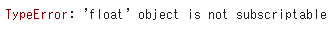

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.iloc[-1]["homepage"]    # DataFrameの最終行

### .dropna()
NaNがある行を全てdropします。

In [ ]:
df.dropna().head(1)

半分以上のレコードがdropされたことが確認できました。

今回はカラム`homepage`がNaNである場合が多いです。 

次は何かカラムを指定してdropしてみましょう。  
※**`np.isnan()`を使えるのは数値項目のみ**

In [ ]:
df[np.isnan(df["runtime"])]

**引数subset**を指定すると、特定のカラムにNaNがあるレコードだけdropすることができます。

In [ ]:
len(df.dropna(subset=["runtime"]))    #2件drop

[こちら](https://bit.ly/3f4lTi3)では`.dropna`についてさらに詳しい紹介がされていますので、興味のある方は是非。

### .fillna()
NaNに特定のValueを代入します。



In [ ]:
df.fillna("ERROR!").head(1)

全ての欠損値に文字列`ERROR!`が入ったことが確認できました（最終行など）。

しかし実際は、NaNに一律の値を入れることはほとんどなく、何か代表値を入れることが多いです。

今回はカラム`runtime`が欠損値であったレコードに対し、何か欠損値を入れてみましょう。  
ここでは**平均値**を代入します。

In [ ]:
df["runtime"].mean()

In [ ]:
df["runtime"].fillna(df["runtime"].mean())    # runtimeカラムのNaNにだけ代入

In [ ]:
print(df.iloc[2656]["runtime"])
df["runtime"] = df["runtime"].fillna(df["runtime"].mean())     # 元のruntimeカラムの値が上書きされる
print(df.iloc[2656]["runtime"])

### pd.isna()
DataFrameの中の値のNaN判定には**`pd.isna()`**を使うことが一般的です。

In [ ]:
df["homepage"].isna()

In [ ]:
df[df["homepage"].isna()].head(1)   # df[np.isnan(df["homepage"])]　と同じ

NaN判定の結果を別カラムで持ちたい時などに使われます。

In [ ]:
df["homepage_nan"] = df["homepage"].isna()    # カラムの追加
df.head(1)

これをNaNのフィルタに使うこともできます。

In [ ]:
df[df["homepage_nan"]]

## groupby
groupbyは、何かのカラムに対して、グループ別に統計量を見たいときによく使います。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")

カラム`language`に対してgroupbyしてみましょう。  
groupbyした後の処理をgroupbyの後の関数で指定します。

In [ ]:
# カラムごとにグループ分けして、そのグループの各カラムの平均値を取得
df.groupby("original_language").mean()

In [ ]:
# 日本語の映画のカラムのみ取得
df.groupby("original_language").mean().loc["ja"]

欠損値が存在する場合など、どこかの値に0が入っていた場合は、  
それに引っ張られて平均値が下がってしまいます。

そのため、フィルタをかけて0のものを除いて平均を取得します。

In [ ]:
df[df["budget"] != 0].groupby("original_language").mean()    #budgetが0の映画を除いて計算

**`.count()`**を使うと、数をカウントしてくれます。

In [ ]:
# budgetが0の映画の数を言語ごとにカウント
df[df["budget"] == 0].groupby("original_language").count() ["budget"]

**`.groupby[].describe()`**とすると、グループ別の各カラムの統計量を一気に取得できます。

In [ ]:
# popularカラムに関して、groupby後の統計量を取得
df.groupby("original_language").describe()["popularity"]

**max**と**min**を使用する際は、カラムを指定する必要があります。

In [ ]:
# popularカラムに関して、groupby後の人気度の最大値を取得
df.groupby("original_language")["popularity"].max()

`max`のところを**`idxmax()`**とすると、各カラムの最大値のレコードのインデックスを取得できます。

In [ ]:
df.groupby("original_language")["popularity"].idxmax()

このインデックスのSeriesを使って、レコードを表示してみましょう。  
非常に便利です。

In [ ]:
# 言語ごとに、映画の人気が最大なもののレコードを取得（日本映画は千と千尋の神隠し）
df.iloc[df.groupby("original_language")["popularity"].idxmax()].head(1)

groupbyについては[こちら](https://www.yutaka-note.com/entry/pandas_groupby)にも詳しい解説があります。

## 表結合
複数の表形式のDataFrameを結合させます。

ここでは、以下の2つのDataFrameについて扱います。  
どちらも同じ値を持つ`key`というカラムを持っています。


In [ ]:
data1 = {
    "key":["b2220050","b2220150","b2220250"],
    "name":["Taro","Hanako","Mike"],
    "sex":["male","female","male"]
}

df1 = pd.DataFrame(data1)
df1

In [ ]:
data2 = {
    "key":["b2220050","b2220150","b2220250"],
    "Age":["21","20","19"],
    "Department":["Ouka","Densi","Jouhou"]
}

df2 = pd.DataFrame(data2)
df2

### pd.concat()
**`pd.concat([df1,df2,…],axis=0)`**は、DataFrameを縦に結合します。

In [ ]:
pd.concat([df1,df2])

**`axis=1`**とすると、横に結合します。  
縦に繋げることの方が圧倒的に多いようです。

In [ ]:
pd.concat([df1,df2],axis=1)

### .merge()
何かのcolumnsを**キー**にして結合する場合に使用します。

In [ ]:
df1.merge(df2)

`.merge()`が持つ引数について理解しましょう。

#### how
どのようにして2つのDataFrameをmergeするかを指定します。

結果を分かりやすくするために、df2を少し変更します。


In [ ]:
data2 = {
    "key":["b2220050","b2220150","b2220350"],    # 最後のレコードのみキーがdf1と異なる
    "Age":["21","20","19"],
    "Department":["Ouka","Densi","Jouhou"]
}

df2 = pd.DataFrame(data2)
df2

デフォルトは**`inner`**です。2つのDataFrameでレコードが見つかった分だけを残してmergeします。

ここで**引数on**を指定します。結合するときにどのカラムをキーにするかを指定します。  
どのカラムで結合するかを明らかにするために、基本は指定します。

In [ ]:
df1.merge(df2,how="inner" , on="key")

**`outer`**は、2つのレコードの値は失われず、紐づけできなかったレコードにはNaNが入ります。

In [ ]:
df1.merge(df2,how="outer" , on="key")

**`left`**と**`right`**は、どちらかのDataFrameをベースにして、紐づいたレコードだけmergeします。

In [ ]:
df1.merge(df2,how="left" , on="key")

実際はベースのDataFrameに追加のDataFrameをmergeする場面がほとんどです。

2つのDataFrameの紐づけが完璧な場合は`inner`、  
追加のDataFrameがレコード不足である場合は`left`、と使い分けることが多いです。

#### on
先ほども少し登場した**引数`on`**ついて触れる前に、DataFrameについて変更を加えます。  
カラム`key`の下にカラム`class`を加えましょう。

In [ ]:
data1 = {
    "key":["b2220050","b2220150","b2220250"],
    "class":["1A","2A","3A"],
    "name":["Taro","Hanako","Mike"],
    "sex":["male","female","male"]
}

df1 = pd.DataFrame(data1)
df1

In [ ]:
data2 = {
    "key":["b2220050","b2220150","b2220350"],
    "class":["1A","2A","3A"],
    "Age":["21","20","19"],
    "Department":["Ouka","Densi","Jouhou"]
}

df2 = pd.DataFrame(data2)
df2

`class`カラムで結合すれば、全てのレコードを問題なく紐づけられます。

In [ ]:
df1.merge(df2,how="inner" , on="class")

ここでDataFrameの名前が被ってしまったので、_xや_yという**suffix**がつきます。  

これを変更したい場合は、**引数`suffixes`**にタプルで入れてあげます。

In [ ]:
df1.merge(df2,how="inner" , on="class",suffixes=("_old","_new"))

####  left_on, right_on
キーにしたいカラム名が2つのDataFrame間で異なるときに使用します。

DataFrameをまた少し変更します。



In [ ]:
data1 = {
    "key1":["b2220050","b2220150","b2220250"],
    "name":["Taro","Hanako","Mike"],
    "sex":["male","female","male"]
}

df1 = pd.DataFrame(data1)
df1

In [ ]:
data2 = {
    "key2":["b2220050","b2220150","b2220350"],    # 最後のレコードのみキーがdf1と異なる
    "Age":["21","20","19"],
    "Department":["Ouka","Densi","Jouhou"]
}

df2 = pd.DataFrame(data2)
df2

ここで`key1`,`key2`をキーにしたいですが、それぞれカラム名が異なります。  
この場合は**引数`on`**が指定できないので、**`left_on`**及び**`right_on`**を指定します。

In [ ]:
df1.merge(df2, left_on="key1", right_on="key2")

カラムはできるだけ同じ名前にして管理するのが無難です。

## DataFrameとSeriesの便利な関数
重要な関数について、何となく頭の片隅に置いて入るくらいに理解していきましょう。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")

### .unique()と.nunique()
Seriesの関数です。  
**`.unique()`**でユニークな値のみを、**`.nunique()`**でユニークな値の数を取得します。  
※ユニークな値：重複がない値


In [ ]:
df["original_language"].unique()

In [ ]:
df["original_language"].nunique()

指定したカラムがどんな値をもっているか把握することができます。

実際にカラム`id`がユニークになっているかを確認することができます。 

In [ ]:
df["id"].nunique()

In [ ]:
len(df)

それぞれのレコードに必ず違うIDが降られていることが確認できました。

### value.counts()
Seriesの関数です。  
それぞれの値にいくつのレコードがあるかを取得します。

In [ ]:
df["original_language"].value_counts()

英語の映画が圧倒的に多いことが分かります。

### .sort_values()
指定したカラムでソートします。デフォルトは昇順です。

In [ ]:
df.sort_values("budget").head(1)    # 予算順に並び替え

『パイレーツ・オブ・カリビアン』が予算が高いことが分かります。

引数で**`ascending=False`**と指定すると、降順に並び替えすることができます。

In [ ]:
df.sort_values("budget",ascending=False).head(1)

ソートについては[こちら](https://www.yutaka-note.com/entry/pandas_sort)にも詳しい解説がありますので、興味のある方は是非。

### .apply()
**`.apply()`**を使うと、DataFrameの全てのレコードに処理をして、その結果を別のカラムに格納することができます。

基本的にDataFrameの操作は`.apply()`で処理していくイメージです。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")

このDataFrameにはカラム`revenue`（興行収入）とカラム`budget`（予算）が存在します。  
この差額がこの映画の利益であるといえます。

利益のSeriesを作り、1つのカラムとしたいと思います。


In [ ]:
# カラムbudgetの値が0のものはNaNに置き換える(def関数)

def return_nan(budget):

  if budget == 0:
    return np.nan    # 引数が0であった場合はNaNを返す

  else:
    return budget   # 引数が0ではない場合はそのまま

print(return_nan(10))
print(return_nan(0))

この関数を`.apply()`を使って全ての行に適用させていきます。

In [ ]:
df["budget"].apply(return_nan)

applyしたSeriesを元のSeriesに代入すれば値を更新することができます。

In [ ]:
df["budget"] = df["budget"].apply(return_nan)

lambda関数くらいでしか使いませんが、if文は**三項演算子**という書き方を使うと1行で記述できます。

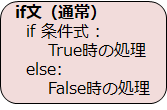

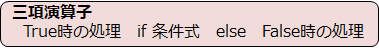

さきほどの関数のif文の箇所を1行で記述しましょう。

In [ ]:
# カラムbudgetの値が0のものはNaNに置き換える(if文1行バージョン)

def return_nan(budget):
  return np.nan if budget == 0 else budget

print(return_nan(10))
print(return_nan(0))

`.apply()`の中に入れる関数は、**lambda関数**を使うことが多いです。  


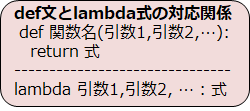

**def、関数名、return、改行、カッコ**の5つを取ればlambda関数の完成です。

In [ ]:
# カラムbudgetの値が0のものはNaNに置き換える(lambda関数バージョン)

lambda budget : np.nan if budget == 0 else budget

print(return_nan(10))
print(return_nan(0))

In [ ]:
df["budget"] = df["budget"].apply(lambda budget : np.nan if budget == 0 else budget)

簡単な関数であれば、applyの際にlambda関数を直接書くことが一般的です。

同じapplyをカラム`revenue`にも適用させましょう。

In [ ]:
df["revenue"] = df["revenue"].apply(lambda revenue : np.nan if revenue == 0 else revenue)

いよいよ利益のSeriesを作っていきます。  
まずはカラム`budget`と`revenue`にNaNが入っているものをドロップしましょう。

In [ ]:
# カラムbudgetとrevenueにNaNが入っているレコードのみドロップ

df = df.dropna(subset=["budget","revenue"])
len(df)

1000件近くレコードがドロップされたことが確認できました。

それでは`profit`というSeriesを作ってみましょう。

In [ ]:
df["profit"] = df["revenue"] - df["budget"]
df["profit"].head(1) 

`profit`というカラムが生成されました。

このカラムの値（映画の利益）が最大になるのはどの映画になるでしょうか。

In [ ]:
df[df["profit"] == df["profit"].max()]

『アバター』という映画になります。

### .iterrows()
DataFrameの行(row)をfor文で回します。戻り値は**(idx,row)**です。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")

レコードの`vote_average`（平均評価）の値が10点満点であったときは、タイトル名を表示するプログラムを書きます。  
中々慣れないですが、結構使う場面は多いようです。

In [ ]:
for idx,row in df.iterrows():    # rowには各行のSeriesが入る
  if row["vote_average"] == 10:    
    print(row["title"])

各レコードの処理をした結果を別のカラムに保存するときは**`.apply()`**を、  
各行自体に何か処理だけをしたいときなどは**.iterrows()**を使うことが多いようです。

今回は変数`idx`は使用していません。  
このように変数をfor文内で利用しない場合は**`_`**とします。

In [ ]:
for _,row in df.iterrows():    # rowには各行のSeriesが入る
  if row["vote_average"] == 10:    
    print(row["title"])

## DataFrameをCSVで保存する
DataFrameでデータ処理のデータは、**CSV形式**で取り扱うことが多いです（ソフトに依存しないため）。  

例えば先ほどカラム`profit`を追加しましたが、このような変更を加えたDataFrameは違うデータとして扱いたいものです。  
このデータを誰かに渡したり、自分でロードしたりする処理をする際に、セーブする作業が必須になってきます。  
そのためCSV形式での保存はよく行われます。

In [ ]:
df = pd.read_csv("tmdb_5000_movies.csv")

先ほどカラム`profit`を追加したDataFrameを作成しました。  
これを別のデータとして保存しましょう。

In [ ]:
#1. budgetやrevenueがゼロであるレコードをドロップする
# わざわざ0をNaNに変換してドロップしなくても、通常のフィルタ操作で可能
df = df[~((df["budget"] == 0) | (df["revenue"] == 0))]

#2. カラムprofitを作る
df["profit"] = df["revenue"] - df["budget"]

#3. profitでsortする
df = df.sort_values("profit" , ascending=False)

では**`.to_csv()`**を使ってこのDataFrameを保存します。  
ファイル名を引数に渡します。

In [ ]:
df.to_csv("tmdb_5000_movies_profit_sorted.csv")

ではこのファイルを読み込んでみましょう。

In [ ]:
df = pd.read_csv("tmdb_5000_movies_profit_sorted.csv")
df.head(1)

一番左に、`unnamed`という余計なカラムが追加されています。  
これは、保存したときのDataFrameのインデックスです。

ほとんどのケースでこのカラムは使う場面はありません。  
そのため、`.to_csv()`の際に**`index=False`**と引数を設定することが多いです。

In [ ]:
df.to_csv("tmdb_5000_movies_profit_sorted.csv" , index=False)
df = pd.read_csv("tmdb_5000_movies_profit_sorted.csv")
df.head(1)